In [1]:
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import data_utils

from pathlib import Path

In [50]:
year = 2017
datafolder = Path("tucu")   # TEC
filepath = Path("sym/ASY_2017-01-01_2017-12-31h_P.dat") # SYMH
tec = data_utils.load_tec_data(year=year, datafolder=datafolder)
symh = data_utils.load_symh_data(filepath=filepath)

In [51]:
df = pd.merge(tec, symh, how="outer", left_on="datetime", right_on=symh.index)

In [15]:
df

,datetime,seconds,TEC,DOY,year,SYM-H
0,2017-01-01 00:00:00,0.0,21.05,1.0,2017.0,-18.0
1,2017-01-01 00:00:15,15.0,21.02,1.0,2017.0,NaN
2,2017-01-01 00:00:30,30.0,20.98,1.0,2017.0,NaN
3,2017-01-01 00:00:45,45.0,20.95,1.0,2017.0,NaN
4,2017-01-01 00:01:00,60.0,20.91,1.0,2017.0,NaN
...,...,...,...,...,...,...
869155,2017-12-31 19:00:00,NaN,NaN,NaN,NaN,15.0
869156,2017-12-31 20:00:00,NaN,NaN,NaN,NaN,12.0
869157,2017-12-31 21:00:00,NaN,NaN,NaN,NaN,5.0
869158,2017-12-31 22:00:00,NaN,NaN,NaN,NaN,-3.0


In [54]:
data = pd.DataFrame()
data["tec"] = df["TEC"]
data["symh"] = df["SYM-H"].ffill()
data.set_index(df.datetime, inplace=True)

<Axes: xlabel='datetime'>

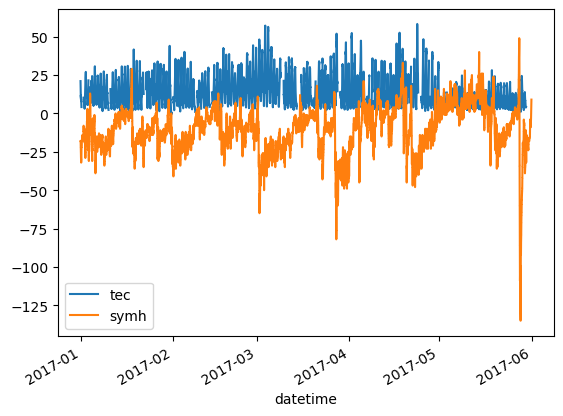

In [30]:
data[:"2017-05"].plot()

In [63]:
import logging

def separar(df, col="tec"):
    dfs = []
    nans = df[col].isna()
    aux_index = np.arange(df[col].size).astype(str)
    aux_index[nans] = "n"   
    test_list = "-".join(aux_index).split("n")

    dfs = []

    for item in test_list:
        if item == "-":
            continue
        t = item.split("-")
        while "" in t:
            t.remove("")
        dfs.append(df.iloc[np.array(t).astype(int)])
    logging.info(f"DataFrame separado en {len(dfs)} DataFrames.")
    return dfs

test_df = pd.DataFrame({"tec": [1, 2, 3, None, None, 4, 5, None, 7]})
dfs = separar(test_df)

In [64]:
dfs = separar(data)

Text(0, 0.5, 'N elements')

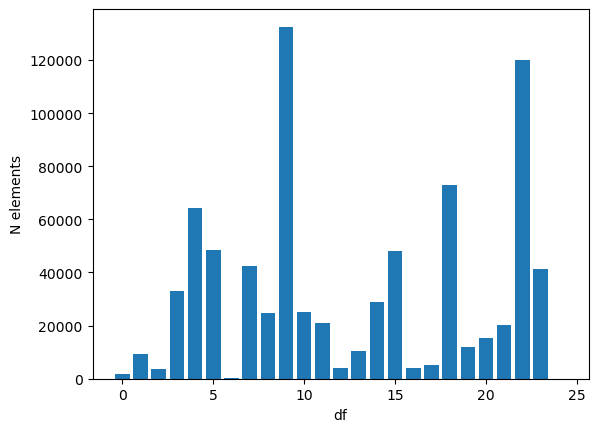

In [77]:
plt.bar(range(len(dfs)), (lambda x: [len(i) for i in x])(dfs) )
plt.xlabel("df")
plt.ylabel("N elements")

In [104]:
from datetime import timedelta

delta_t = (data.index[2] - data.index[1]).seconds
segundos_dia = 24*3600
valores_por_dia = round(segundos_dia/delta_t)
valores_minimos = 2*valores_por_dia

11520